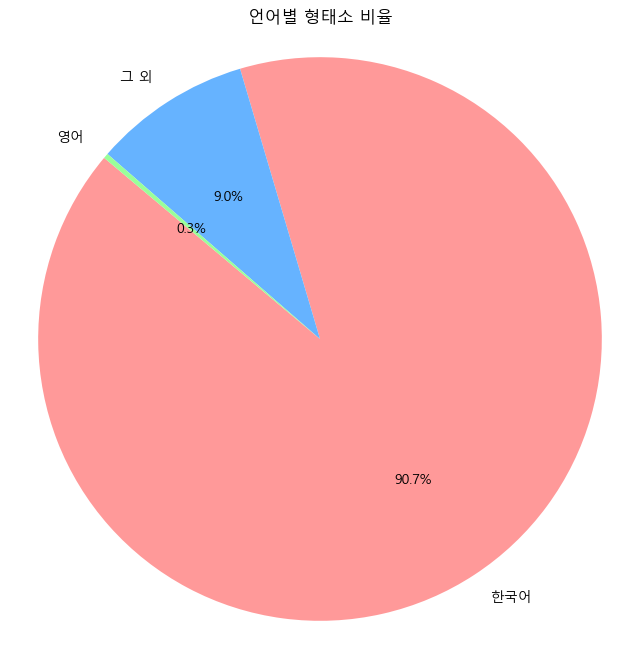

In [5]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.style.use('default')

font_location = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font',family = font_name)

# 데이터 불러오기
data_path = 'C:/Users/USER/Desktop/핵심역량 프로젝트/데이터/라벨링 데이터/0727_masking_labeling_data.csv'
data = pd.read_csv(data_path)

# 특정 컬럼 선택 (예: 'text_morphed')
column = 'text_morphed'
texts = data[column].dropna()

def classify_word(word):
    if re.match(r'^[a-zA-Z]+$', word):
        return '영어'
    elif re.match(r'^[ㄱ-ㅎㅏ-ㅣ가-힣]+$', word):
        return '한국어'
    else:
        return '그 외'

def process_text(text):
    words = text.split()  # 형태소가 공백으로 구분되어 있다고 가정
    word_classes = [classify_word(word) for word in words]
    return word_classes

# 형태소 분리 및 언어 분류
all_word_classes = []
for text in texts:
    word_classes = process_text(text)
    all_word_classes.extend(word_classes)

# 비율 계산
class_counts = Counter(all_word_classes)
total_words = sum(class_counts.values())
class_ratios = {cls: count / total_words for cls, count in class_counts.items()}

# 원 그래프 시각화
labels = class_ratios.keys()
sizes = class_ratios.values()
colors = ['#ff9999','#66b3ff','#99ff99']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('언어별 형태소 비율')
plt.axis('equal')  # 원 형태 유지
plt.show()

